# Data Exploration with Descriptive Statistics and Visualizations

This is a sample solution for the data exploration exercise. This does not mean that this is the only way to solve this exercise. As with any programming task - and also with most data analysis tasks - there are multiple solutions for the same problem. 

## Data for this exercise

We use the boston house price data in this exercise. The data is available as part of ```sklearn``` for [Python](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets). The description of the data is provided together with the actual data and should be the starting point for your analysis of the data. 

## Descriptive statistics of the boston data

Explore the boston data using descriptive statistics. Calculate the central tendency with the mean and median, the variability through the standard deviation and the IQR, as well as the range of the data. The real task is understanding something about the data from these results. For example, what can you learn about the CRIM feature from the mean and the median?

In [12]:
import pandas as pd
from sklearn import datasets

# first we load the data and print description
boston = datasets.load_boston()
print(boston.DESCR)

# we convert the data into a data frame and use the convenient describe function from pandas
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.describe()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Some things we can learn from the summary statistics:
- The mean of CRIM is much larger than the median (50%). The together with the very large max value this is a strong indicator that the distribution is not symmetric around the mean and likely as a long right-tail. Since the median is close the the minimal value, this also indicates that a lot of data is located in a small region on the left side of the distribution. Together with the description of the data, this means that there are many regions with a low crime rate and a relatively small portion of regions has a higher crime rate. 
- The data indicates that RM is likely symmetric around the mean. This is indicated because the mean and the median are roughly equal, and the distance from the lower quartile (25%) is similar to the distance of the upper quartile (75%) from the median. Whether RM follows a gaussian distribution cannot be evaluated without statistical tests or at least a visualization. Given that this feature models the number of rooms, it also makes sense that the data is not dominated by outliers.
- CHAS seems to have a strange distribution, because the min and the upper quartile of the same value of 0. This fits the description that this is just a dummy variable used as control. 

## Visualizations

The Python library ```matplotlib``` is great for creating all kinds of visualizations. There are even libraries on top of ```matplotlib``` that facilitate relatively complex visualizations in a single line of code like ```seaborn```. 


### Analyze single features of the boston data

Visually analyze features ```zn``` and ```indus``` of the boston data. Use the techniques described in Chapter 3, i.e., histograms and density plots (with/without rugs). What can you learn about these features from these plots? What are the advantages and drawbacks of the different plots for this data?

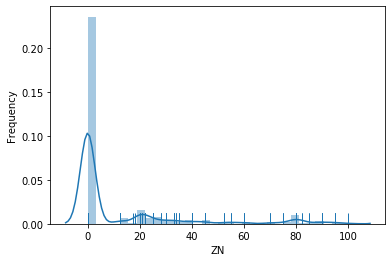

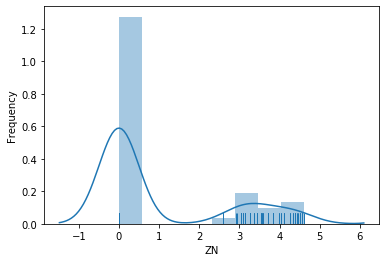

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure()
sns.distplot(boston_df['ZN'], rug=True)
plt.xlabel('ZN')
plt.ylabel('Frequency')
plt.show()

plt.figure()
sns.distplot(np.log1p(boston_df['ZN']), rug=True)
plt.xlabel('ZN')
plt.ylabel('Frequency')
plt.show()

Some things we can learn about ZN:
- Most values of ZN are zero. While the histogram does not indicate this for certain, the rug shows that the data is at exactly zero.
- The remainder of the values is spread out over the rest of the range of the data and relatively sparse.
- When we apply the logarithm, it looks like the data that is not zero may follow a lognormal distribution. 
- Overall, we know from this feature that there are many pure industrial regions in the data (ZN=0), but there are almost no pure residential areas (ZN=100). 

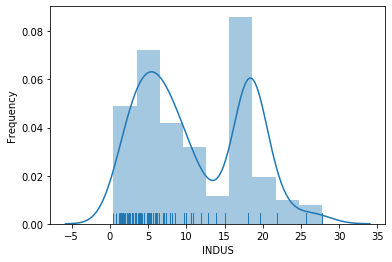

In [16]:
plt.figure()
sns.distplot(boston_df['INDUS'], rug=True)
plt.xlabel('INDUS')
plt.ylabel('Frequency')
plt.show()

Some things we can learn about INDUS:
- The plot indicates that INDUS is likely a bimodal (a mixture of two distributions): there seems to be one kind of region with a normal distribution with a mean around 5 and another, possibly exponential distribution for values larger than 15. 
- Given the definition of INDUS, we learn that there are regions with relatively few non-retail business (i.e., regions in which most businesses are shops) and regions in which there is a larger percentage of non-retail businesses. Non-retail business may be offices or factories.

Regarding the advantages and drawbacks of the visualizations: 
- Without the rug, we could not see if the values are really exactly zero for ZN, this information is hidden with histograms and density plots. 
- The density plot for INDUS looks like there would be a second normal distribution for INDUS with a mean around 18, but this is not supported by the rug or histogram. 
- The density plot helps to see the normal distribution around 5 for INDUS. 
- Overall, the combination of histogram, density plot, and rug cancels out the weaknesses of the individual plots. 

### Analyze the pair-wise relationships between the features of the boston data

Next, analyze the pair-wise relationships between all fourteen features of the boston data. First, analyze their relationship through scatter plots. Then, create a heatmap of the correlations between the features. What did you learn about the data?

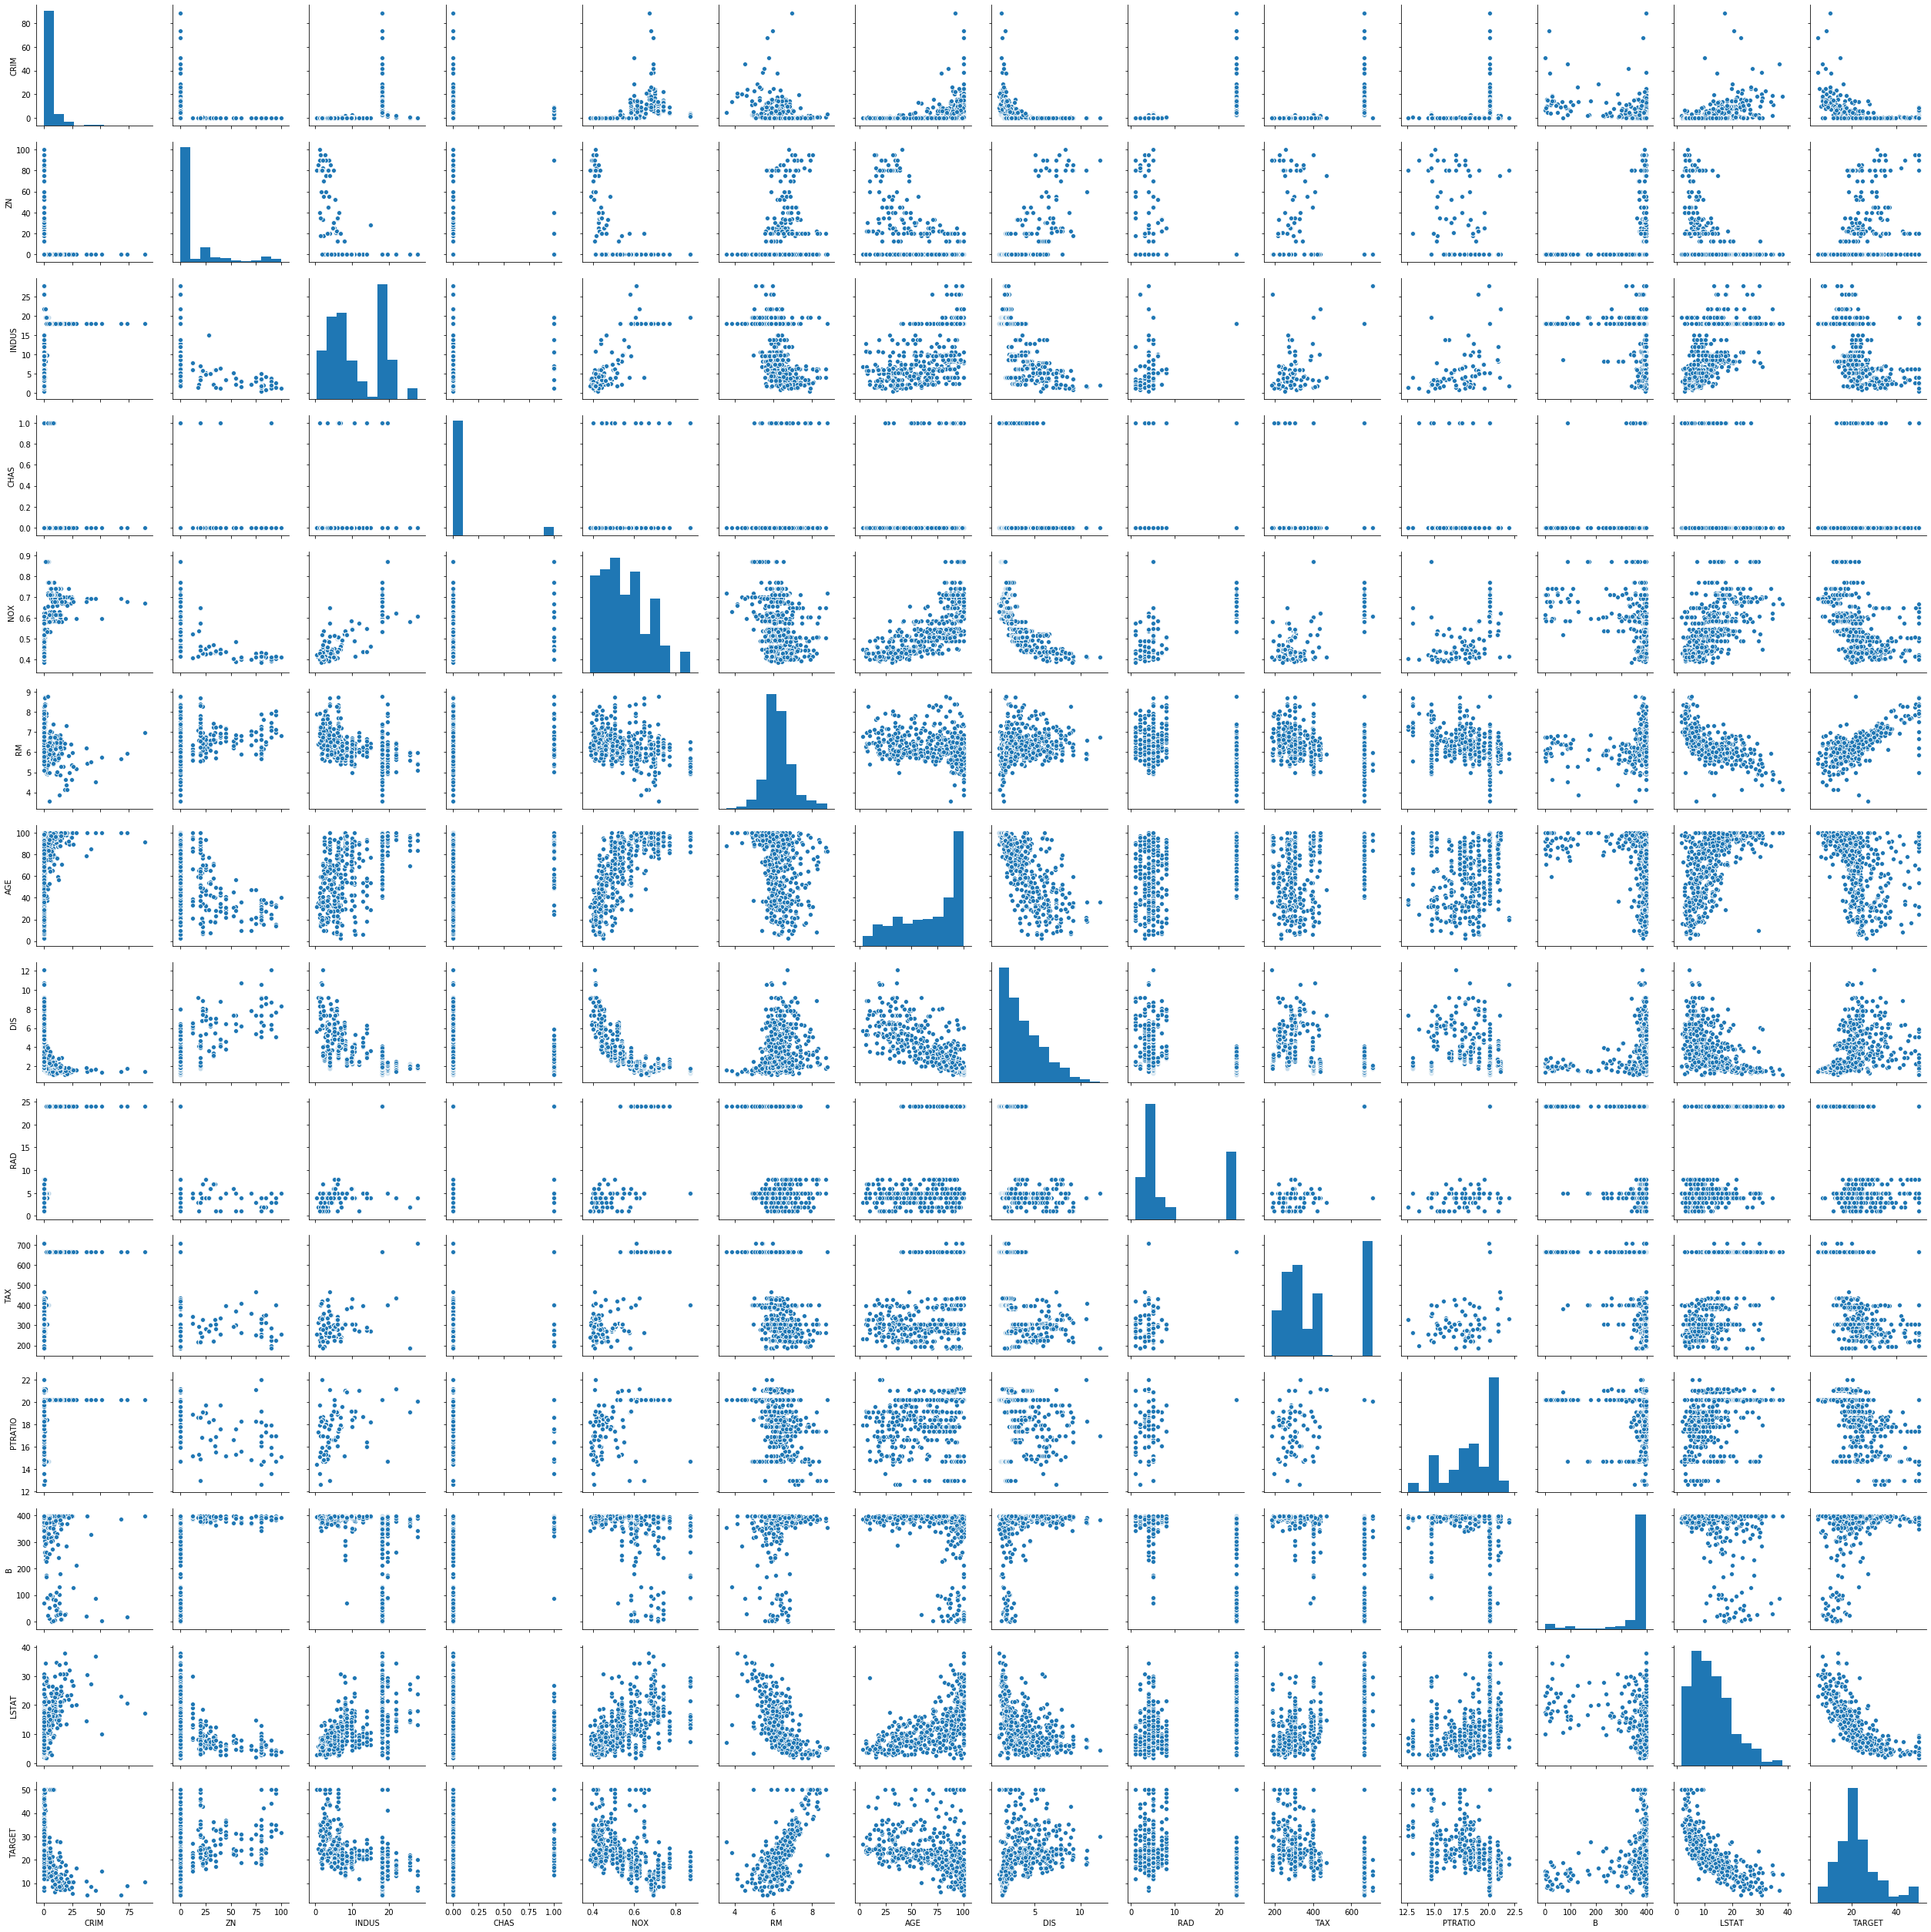

In [24]:
# we need to add the target as the fourtenths feature to the data frame
boston_df['TARGET'] = boston.target
# the rest is automatically done by seaborns powerful pairplot function
sns.pairplot(boston_df)
plt.show()

Here are some things you can learn from the pairplot:
- There seems to be a negative correlation between the following pairs of features: CRIM and TARGET; DIS and INDUS; DIS and NOX; LSTAT and RM; LSTAT and TARGET; DIS and AGE. 
- There seems to be a positive correlation between the following pairs of features: DIS and ZN; NOX and INDUS; TAX and INDUS; PTRATIO and INDUS; AGE and NOX; TAX and NOX; RM and TARGET.
- There may be some more correlations, but they seem to be fairly week. Many relationships between features look rather random.
- It may be possible to draw some cautious conlusions about the data from the correlations, e.g., that regions where the property tax is higher tend to have more non-retail business and a higher nitrous oxide concentration and that the nitrous oxide concentration decreases with distance from employment centers. But these conclusions would be relatively weak and require further analysis of the interactions between the features. 

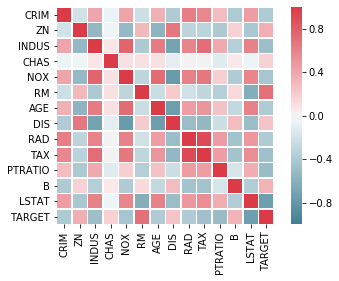

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(boston_df.corr(), square=True, linewidths=.5, 
            vmin=-1.0, vmax=1.0, cmap=cmap, annot=False)
plt.show()

The correlation heatmap confirms the analysis of the correlations from the pairwise plots. The advantage of the correlation heatmap is that the correlations are displayed more densly and easier to interpret. However, the pairwise plot allows insights into the actual locations of the data. 